# Convex Optimization: Convexity

**Prerequisites**

- Linear Algebra
- Calculus


**Outcomes**

TODO: clean this up

## Outline

- Convex Sets
- Mathematical Functions
- Linear Programming
- The Dual Problem
- `cvxopt` and `scipy.optimize.linprog`

In [78]:
import matplotlib.pyplot as plt
import numpy as np

## Convex Sets

Let $C \subseteq \mathbb{R}^n$

$C$ is *convex* if for any $x_1, x_2 \in C$ and any $\theta \in [0, 1]$ we have $$\theta x_1 + (1- \theta) x_2 \in C$$

### Convex Combination

The definition of convexity can be extended to include convex combinations

A (finite) *convex combination* of $x_i \in {C}\; i = 1, \dots, k$ has the form $$\sum_{i=1}^k \theta_i x_i, \quad \theta_i \ge 0 \; i = 1, \dots, k, \; \sum_{i=1}^k \theta_i = 1$$

<a id='exercise-0'></a>
**Exercise 1**

Show that for a convex set $C \subseteq \mathbb{R}^n$ any convex combination of members of $C$ is in $C$

### Convex Hull

The *convex hull* of a set $C$ ($\textbf{conv} C$) is the set of all covex combinations of points in $C$: $$\textbf{conv}C = \left\{\sum_{i=1}^k \theta_i x_i \bigm \vert x_i \in C, \theta_i \ge 0, i = 1, \dots k, \sum_{i=1}^k \theta_i = 1 \right\}$$

#### Example

Consider this set of random points in $\mathbb{R}^2$


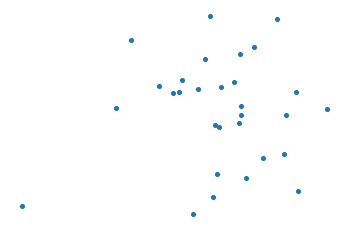

In [79]:
X = np.random.randn(30, 2)  # 30 points in R2
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], "o", ms=4);
ax.axis("off");

The convex hull of this set of points is

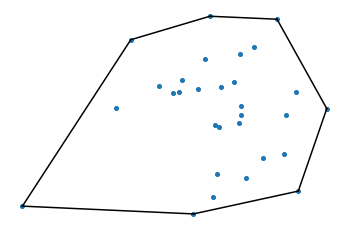

In [80]:
from scipy.spatial import ConvexHull
_, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], "o", ms=4)
for simplex in ConvexHull(X).simplices:
    ax.plot(X[simplex, 0], X[simplex, 1], "k-")
ax.axis("off");

The convex hull of a set $C$ is the smallest convex that contains $C$

<a id='exercise-1'></a>
**Exercise 2**

Draw the convex hull of the set in the image below

![Non-convex-set](non-convex-set.png)

<a id='exercise-2'></a>
**Exercise 3**

Show that if $C$ is convex, then $\textbf{conv} C = C$

## Mathematical Functions


### Functions

A function $f: A \rightarrow B$ is 

- a mapping (relation) from a set of inputs ($A$) to a set of outputs ($B$)
- and each input is related to exactly one output

#### Function Domain

The **domain** of a function $f: A \rightarrow B$ is the set $A$

We will follow notation of Boyd et al. 2004 and often write $$f: \mathbb{R}^n \rightarrow \mathbb{R}^m,$$

where in the notation above, we mean that $A \subseteq \mathbb{R}^N$

When using this notation, to refer to the domain of $f$ we will use $\textbf{dom} f$

### Linear Functions

A function $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ is *linear* if it can be expressed in the form $$f(x) = Ax, \quad A \in \mathbb{R}^{m \times n}$$

In the case where $m = 1$ we often write $$f(x) = c^Tx,  \quad c \in \mathbb{R}^n$$

<p style="color: red; font-size: 40px;">TODO: example </p>

### Affine functions

A function $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ is *affine* if it is the sum of a linear function and a constant $$f(x) = Ax + b, \quad A \in \mathbb{R}^{m \times n}, \; b \in \mathbb{R}^m$$

<p style="color: red; font-size: 40px;">TODO: example </p>

### Convex Functions

A function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is *convex* if :

1. $\textbf{dom} f$ is convex
2. $\forall x, y \in \textbf{dom} f$ and $\theta \in [0, 1]$ $$f(\theta x + (1 - \theta) y) \le \theta f(x) + (1 - \theta) f(y)$$

#### Graphical Interpretation

For any convex function $f$ and $x, y \in \textbf{dom} f$ the line between $(x, f(x))$ and $(y, f(y))$ is above the graph $f$

For example:

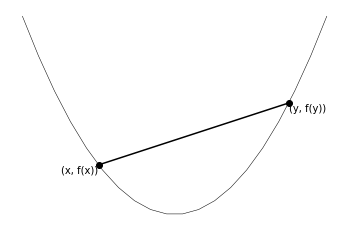

In [81]:
def f(x):
    return x**2

X = np.linspace(-2, 2, 20)
x = -1
y = 1.5

# plot function
fig, ax = plt.subplots()
ax.plot(X, f(X),  "k-", lw=0.5)

# plot f(x), and f(y)
ax.plot(x, f(x), "ko")
ax.plot(y, f(y), "ko")

# plot chord between (x, f(x)) and (y, f(y))
ax.plot([x, y], [f(x), f(y)], "k-")

# add annotations
ax.text(x, f(x), "(x, f(x))", verticalalignment="top", horizontalalignment="right")
ax.text(y, f(y), "(y, f(y))", verticalalignment="top", horizontalalignment="left")
ax.axis("off");


<a id='exercise-3'></a>
**Exercise 4**

Show that all linear functions are convex

*Hint:* To do this show that the convexity inequality above (condition 2) holds with equality when $f$ is linear

#### First order conditions

Define $\nabla f$ as the *gradient* of $f$: $$\nabla f \equiv \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n}\end{bmatrix}$$

$f$ is convex if and only iff for all $x, y \in \textbf{dom} f$

$$f(y) \ge f(x) + \nabla f(x)^T (y - x)$$

The right hand side is an affine function of $y$ and is the first-order Taylor approximation of $f$ around $x$

The interpretation of the inequality says that the first-order Taylor approximation is a *global underestimator* of $f$

For convex functions **local** information (first-order Taylor approximation around $x$) provides **global** information

We will use this property heavily when considering optimization because $$\nabla f(x) = 0 \Longrightarrow x \text{ is a global minimizer of } f$$

## Linear Programs

A **linear program** is an optimization problem of the form

$$\begin{align*}
\min_x \ & c^T x \\
\mbox{subject to } \ & Gx \le h \\
& Ax = b\\
\end{align*}$$

### Standard Form

A *linear program in standard form* has only equality constraints and a non-negativity constraint on $x$:

$$\begin{align*}
\min_x \ & c^T x \\
& Ax = b,\\
& x_i \ge 0 \; \forall i
\end{align*}$$

<a id='exercise-4'></a>
**Exercise 5**

Convert a linear program in the general form to a linear program in standard form


*Hint:* You will need to introduce a new vector (of slack variables) into the constraints

<p style="color: red; font-size: 40px;">TODO: example </p>

## The Dual Problem

## Python Tools: `cvxopt` and `scipy.optimize.linprog`

### `cvxopt`

### `scipy.optimize.linprog`

### References

Boyd, Stephen, Stephen P. Boyd, and Lieven Vandenberghe. 2004. Convex Optimization. Cambridge University Press.